In [14]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [15]:
mortgage = pd.read_csv("state_CO_lei_7H6GLXDRUGQFU57RNE97.csv")

In [16]:
mortgage.head()

activity_year                   lei  derived_msa-md state_code  \
0           2023  7H6GLXDRUGQFU57RNE97           14500         CO   
1           2023  7H6GLXDRUGQFU57RNE97           24540         CO   
2           2023  7H6GLXDRUGQFU57RNE97           17820         CO   
3           2023  7H6GLXDRUGQFU57RNE97           22660         CO   
4           2023  7H6GLXDRUGQFU57RNE97           24540         CO   

   county_code  census_tract conforming_loan_limit derived_loan_product_type  \
0         8013    8013060900                     C   Conventional:First Lien   
1         8123    8123001905                     C   Conventional:First Lien   
2         8041    8041003306                     C   Conventional:First Lien   
3         8069    8069001106                     C   Conventional:First Lien   
4         8123    8123002008                     C   Conventional:First Lien   

              derived_dwelling_category        derived_ethnicity  ...  \
0  Single Family (1-4 Units):Site-Built  Ethnicity Not Available  ...   
1  Single Family (1-4 Units):Site-Built  Ethnicity Not Available  ...   
2  Single Family (1-4 Units):Site-Built  Ethnicity Not Available  ...   
3  Single Family (1-4 Units):Site-Built  Ethnicity Not Available  ...   
4  Single Family (1-4 Units):Site-Built  Ethnicity Not Available  ...   

  denial_reason-2 denial_reason-3  denial_reason-4  tract_population  \
0             NaN             NaN              NaN              5441   
1             NaN             NaN              NaN              4712   
2             NaN             NaN              NaN              3248   
3             NaN             NaN              NaN              5312   
4             NaN             NaN              NaN              6148   

   tract_minority_population_percent  ffiec_msa_md_median_family_income  \
0                              24.79                             144100   
1                              63.60                             109300   
2                              24.88                             105000   
3                              21.69                             118700   
4                              21.01                             109300   

   tract_to_msa_income_percentage  tract_owner_occupied_units  \
0                           90.75                        1480   
1                           74.38                        1135   
2                          153.20                         983   
3                           67.28                        1033   
4                          163.09                        1504   

   tract_one_to_four_family_homes  tract_median_age_of_housing_units  
0                            1669                                 30  
1                            1531                                 32  
2                            1226                                 27  
3                            1512                                 41  
4                            1493                                 14  

[5 rows x 99 columns]

In [17]:
mortgage.shape

(2811, 99)

#### For checking the null values for both, numerical and categorical data.

In [18]:
nan_counts = mortgage.isnull().sum()
zero_counts = (mortgage == 0).sum()
empty_string_counts = (mortgage == '').sum()

missing_values = pd.DataFrame({
    'NaN Count': nan_counts,
    'Zero Count': zero_counts,
    'Empty String Count': empty_string_counts
})

print(missing_values)

                                   NaN Count  Zero Count  Empty String Count
activity_year                              0           0                   0
lei                                        0           0                   0
derived_msa-md                             0           0                   0
state_code                                 0           0                   0
county_code                                0           0                   0
...                                      ...         ...                 ...
ffiec_msa_md_median_family_income          0           0                   0
tract_to_msa_income_percentage             0          25                   0
tract_owner_occupied_units                 0           0                   0
tract_one_to_four_family_homes             0           1                   0
tract_median_age_of_housing_units          0         167                   0

[99 rows x 3 columns]


#### Checking if there are any duplicate values in the data and if yes, we remove them.

In [19]:
print("Number of duplicates:", mortgage.duplicated().sum())

Number of duplicates: 3


#### We are removing duplicates because it represents repeated observations.

In [20]:
mortgage=mortgage.drop_duplicates()
print("Number of duplicates:", mortgage.duplicated().sum())

Number of duplicates: 0


#### This cell shows that there are 99 features and also shows their respective data type.

In [21]:
mortgage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2808 entries, 0 to 2810
Data columns (total 99 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   activity_year                             2808 non-null   int64  
 1   lei                                       2808 non-null   object 
 2   derived_msa-md                            2808 non-null   int64  
 3   state_code                                2808 non-null   object 
 4   county_code                               2808 non-null   int64  
 5   census_tract                              2808 non-null   int64  
 6   conforming_loan_limit                     2763 non-null   object 
 7   derived_loan_product_type                 2808 non-null   object 
 8   derived_dwelling_category                 2808 non-null   object 
 9   derived_ethnicity                         2808 non-null   object 
 10  derived_race                        

#### This cell converts the below mentioned features to categorical from numeric as we know features like `county_code` does not fall under the numeric feature type.

In [22]:
mortgage['county_code'] = mortgage['county_code'].astype(str)
mortgage['census_tract'] = mortgage['census_tract'].astype(str)
mortgage['activity_year'] = mortgage['activity_year'].astype('category')
mortgage['action_taken'] = mortgage['action_taken'].astype(str)
mortgage['purchaser_type'] = mortgage['purchaser_type'].astype(str)
mortgage['preapproval'] = mortgage['preapproval'].astype(str)
mortgage['loan_type'] = mortgage['loan_type'].astype(str)
mortgage['loan_purpose'] = mortgage['loan_purpose'].astype(str)
mortgage['occupancy_type'] = mortgage['occupancy_type'].astype(str)
mortgage['hoepa_status'] = mortgage['hoepa_status'].astype(str)
mortgage['business_or_commercial_purpose'] = mortgage['business_or_commercial_purpose'].astype(str)
mortgage['open-end_line_of_credit'] = mortgage['open-end_line_of_credit'].astype(str)
mortgage['lien_status'] = mortgage['lien_status'].astype(str)
mortgage['reverse_mortgage'] = mortgage['reverse_mortgage'].astype(str)
mortgage['derived_msa-md'] = mortgage['derived_msa-md'].astype(str)

#### The below cell is for identifying the categorical values.

In [23]:
categorical_columns = mortgage.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'hoepa_status', 'occupancy_type', 'total_units', 'debt_to_income_ratio',
       'applicant_age', 'co-applicant_age', 'applicant_age_above_62',
       'co-applicant_age_above_62'],
      dtype='object')


#### The below cell is for identifying the numerical values.

In [24]:
numeric_columns = mortgage.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'total_loan_costs', 'total_points_and_fees', 'origination_charges',
       'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest',
       'multifamily_affordable_units', 'income', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5',
       'co-applicant_ethnicity-1', 'co-applicant_ethnicity-2',
       'co-applicant_ethnicity-3', 'co-applicant_ethnicity-4',
       'co-applicant_ethnicity-5', 'applicant_ethnicity_observed',
       'c

#### The `describe` function gives the 5-number summary along with the count, mean and standard deviation of the respective features specified which in this case would be the numerical features alone as finding the statistics for catergorical values is meaningless. 

In [25]:
pd.set_option('display.float_format', '{:.2f}'.format)
numeric_summary = mortgage[numeric_columns].describe().transpose()
numeric_summary

count      mean        std      min  \
loan_amount                       2808.00 976816.24 1803994.51  5000.00   
loan_to_value_ratio               1375.00     68.29      21.00     4.00   
interest_rate                     2250.00      5.77       1.54     2.00   
rate_spread                       1134.00     -0.03       0.65    -3.19   
total_loan_costs                  1899.00   6924.18   11267.78     0.00   
...                                   ...       ...        ...      ...   
ffiec_msa_md_median_family_income 2808.00 117303.92   16044.62 82700.00   
tract_to_msa_income_percentage    2808.00    121.30      45.86     0.00   
tract_owner_occupied_units        2808.00   1179.81     590.81    66.00   
tract_one_to_four_family_homes    2808.00   1505.97     631.88     0.00   
tract_median_age_of_housing_units 2808.00     32.23      17.41     0.00   

                                        25%       50%       75%         max  
loan_amount                       325000.00 525000.00 985000.00 32505000.00  
loan_to_value_ratio                   55.00     75.00     80.00      113.00  
interest_rate                          5.25      6.12      6.88        9.85  
rate_spread                           -0.43     -0.04      0.35        2.62  
total_loan_costs                    2806.18   4444.50   8296.65   324499.89  
...                                     ...       ...       ...         ...  
ffiec_msa_md_median_family_income 105000.00 125500.00 125500.00   144100.00  
tract_to_msa_income_percentage        89.73    118.60    150.16      282.77  
tract_owner_occupied_units           709.00   1134.00   1552.00     3193.00  
tract_one_to_four_family_homes      1054.00   1456.00   1878.00     3833.00  
tract_median_age_of_housing_units     20.00     32.00     43.00       79.00  

[70 rows x 8 columns]

#### Important Points and Insights from the above statistics:

* `loan_amount`: A mean 976,816 USD suggests that the average loan amount in this dataset is quite high, likely because of the inclusion of high-value loans and a SD of 1,803,994.51 USD indicates a significant spread in loan amounts, suggesting there are some very large loans in the dataset. The min and max imply that there's a huge range in the types of loans, from small personal loans to potentially large commercial or real estate loans. So, from this we can say that the distribution of loan amounts is highly skewed due to the presence of outliers, which significantly influence the mean.

* `loan_to_value_ratio`: The mean of 68.29 indicates the average loan covers about 68% of the property value. The ratio ranges from 4% to 113%, with the upper limit possibly indicating loans that exceed the value of the asset (i.e., over-leveraging). We can tell that a typical loan to value ratio around 75% is expected in home loans, but there are some loans with very low LTV (below 55%) and high LTV (above 100%) possibly indicating higher risk or unique loan situations.

* `interest_rate`: A mean of 5.77% reflects a typical interest rate for the loans in this dataset. The lowest interest rate is 2%, while the highest is 9.85%, indicating a diverse range of loan types and borrower profiles. Interest rates are centered around 5-6%, but the wide range from 2% to nearly 10% might reflect different loan products or borrower creditworthiness.

* `total_loan_costs`: A mean of 6,924.18 USD shows the average cost to the borrower in fees and other loan-related expenses. The SD of 11,267.78 USD indicates a large spread in loan costs, likely driven by factors like loan size, type, and fees. There’s a wide variation in total loan costs, with some borrowers paying substantial fees, likely influenced by loan size and type.

* `ffiec_msa_md_median_family_income`: The median family income (by MSA): 117,303.92 USD shows the average median family income for the MSA (Metropolitan Statistical Area) regions in the dataset. A SD of 16,044.62 USD suggests some variation in family income between different MSAs. Family income distribution is centered around the 100,000 USD to $125,000 USD range, reflecting a moderate level of income across the MSAs covered.

General Insights:
* Skewed Distributions: Many features have high standard deviations and wide ranges, particularly for loan amount, loan costs, and interest rates, indicating a mix of small, average, and high-value loans.
* High Outliers: For features like loan amount and total loan costs, there are a few very large values that drive up the mean significantly above the median, indicating the presence of outliers.
* Variability in Income and Housing: There’s moderate variability in median family income and housing-related features, suggesting socioeconomic diversity in the areas covered by this dataset.
  
These insights provide a solid understanding of the data distributions and possible areas of focus for further analysis.

#### What are Central tendency, dispersion and QQ plots?

Central tendency refers to statistical measures that describe the center or typical value of a dataset. The main measures include the mean, which is the average of all values; the median, which is the middle value when the data is sorted; and the mode, which is the most frequently occurring value. 

Dispersion indicates how spread out the values in a dataset are. Key measures include variance, standard deviation and the interquartile range (IQR.

QQ (Quantile-Quantile) plots are used to compare the distribution of a dataset to a theoretical distribution, such as the normal distribution.

Central Tendency:
        loan_amount  loan_to_value_ratio  ffiec_msa_md_median_family_income  \
mean      976816.24                68.29                          117303.92   
median    525000.00                75.00                          125500.00   
mode      505000.00                80.00                          125500.00   

        tract_to_msa_income_percentage  tract_one_to_four_family_homes  
mean                            121.30                         1505.97  
median                          118.60                         1456.00  
mode                            242.35                         1763.00  

Dispersion:
                                          variance    std_dev       IQR
loan_amount                       3254396201346.44 1803994.51 660000.00
loan_to_value_ratio                         440.85      21.00     25.00
ffiec_msa_md_median_family_income     257429696.08   16044.62  20500.00
tract_to_msa_income_percentage             2103.16      45.86     60.43


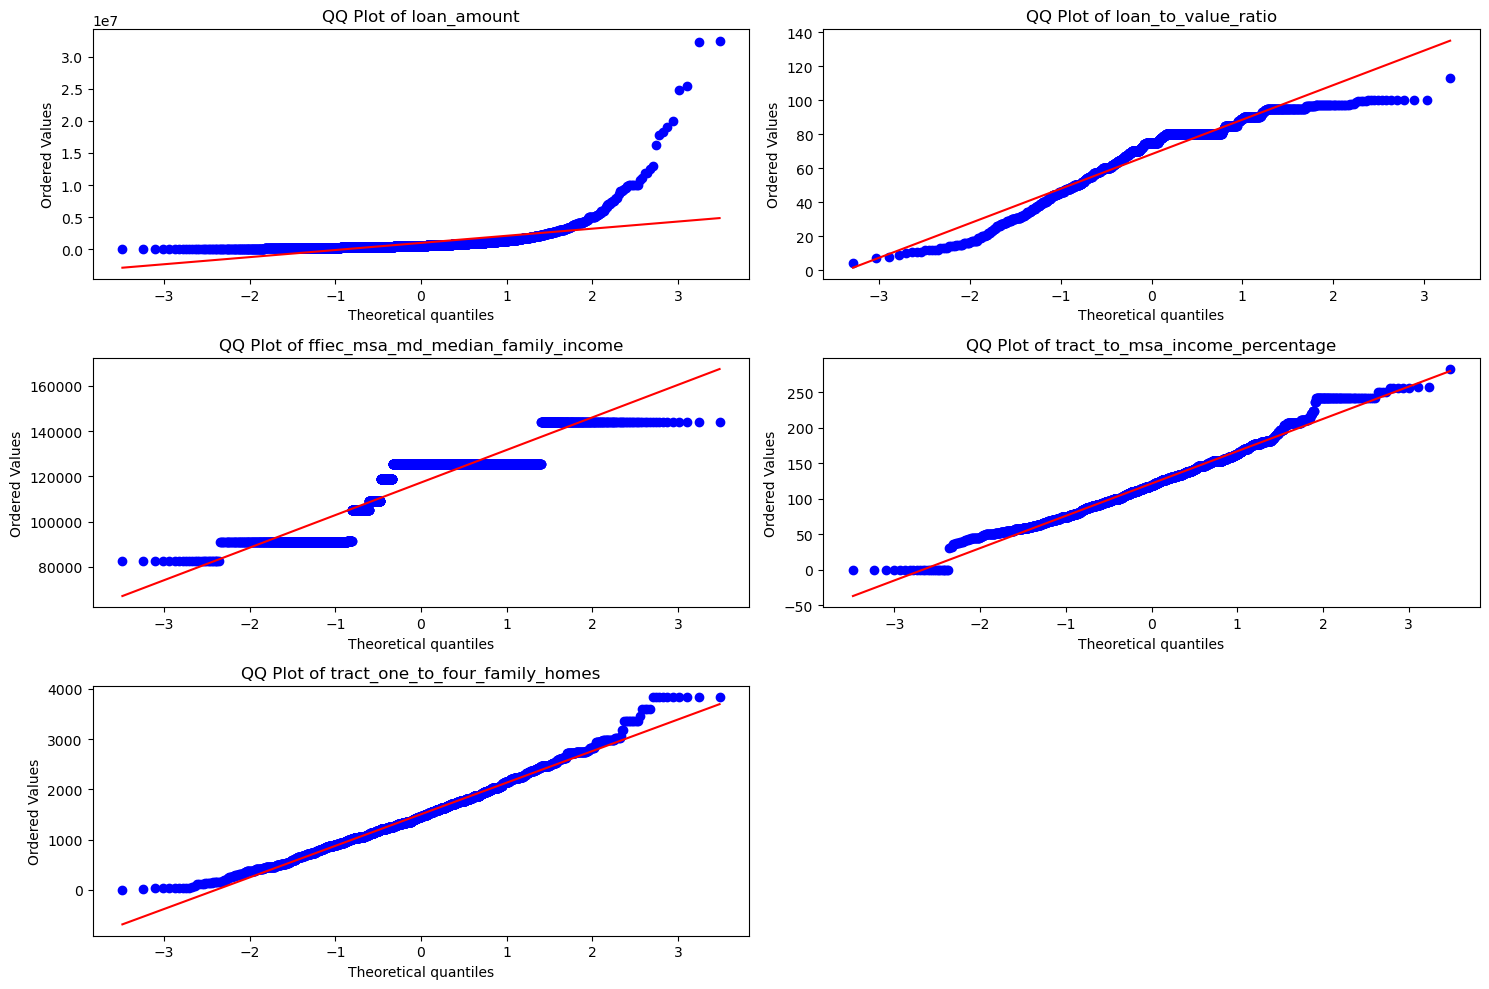

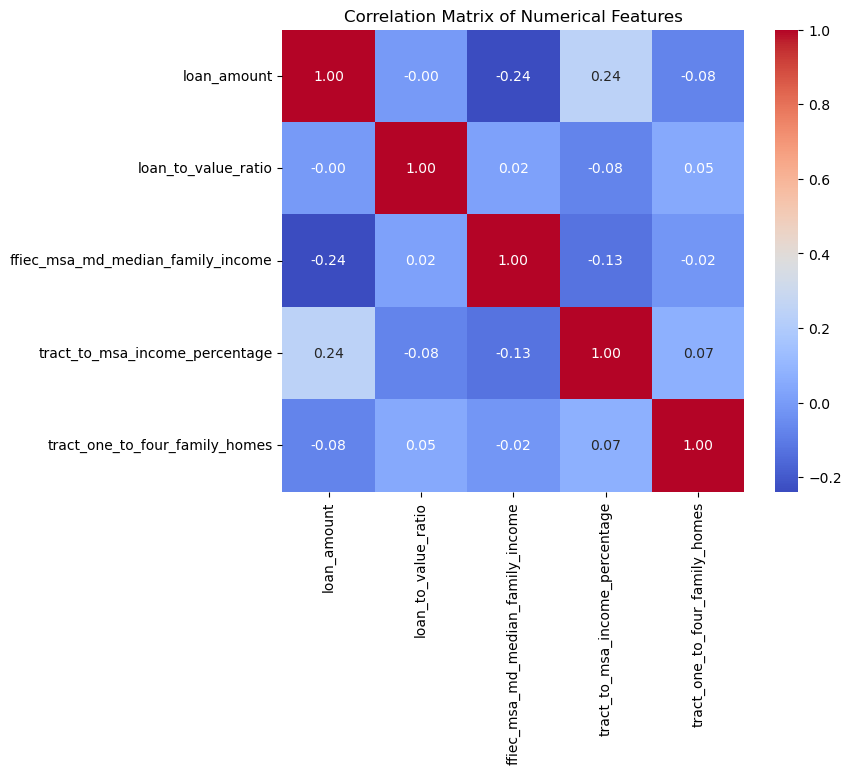

Correlation Matrix:
                                   loan_amount  loan_to_value_ratio  \
loan_amount                               1.00                -0.00   
loan_to_value_ratio                      -0.00                 1.00   
ffiec_msa_md_median_family_income        -0.24                 0.02   
tract_to_msa_income_percentage            0.24                -0.08   
tract_one_to_four_family_homes           -0.08                 0.05   

                                   ffiec_msa_md_median_family_income  \
loan_amount                                                    -0.24   
loan_to_value_ratio                                             0.02   
ffiec_msa_md_median_family_income                               1.00   
tract_to_msa_income_percentage                                 -0.13   
tract_one_to_four_family_homes                                 -0.02   

                                   tract_to_msa_income_percentage  \
loan_amount                                        

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

numerical_data = [
    'loan_amount',
    'loan_to_value_ratio',
    'ffiec_msa_md_median_family_income',
    'tract_to_msa_income_percentage',
    'tract_one_to_four_family_homes'
]

data = mortgage[numerical_data]

central_tendency = data.agg(['mean', 'median'])
central_tendency.loc['mode'] = data.mode().iloc[0]  # Get the mode
print("Central Tendency:")
print(central_tendency)
variance = data.var()
std_dev = data.std()
IQR = data.apply(lambda x: np.percentile(x.dropna(), 75) - np.percentile(x.dropna(), 25))

dispersion = pd.DataFrame({
    'variance': variance,
    'std_dev': std_dev,
    'IQR': IQR
})

print("\nDispersion:")
print(dispersion)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_data):
    plt.subplot(3, 2, i + 1)
    stats.probplot(data[feature].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {feature}')

plt.tight_layout()
plt.show()

correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

* High central tendency values in loan amounts and income indicate significant lending and earning potential in the dataset.
* High dispersion values, particularly in loan amounts, suggest a diverse market, possibly with some loans significantly larger or smaller than others.
* The IQR and standard deviation provide insights into the stability and consistency of various measures, indicating areas where financial stability or volatility may be present.

As for the QQ plots: 
* The loan amount plot shows strong right-skewed distribution (curves up sharply). There is a significant deviation from normal distribution, especially for larger loan amounts.
* The Loan to Value Ratio QQ Plot indicates the relatively closeness to normal distribution in middle range (follows red line). Suggests most loans have standard Loan to Value Ratio with some regulatory caps.
* FFIEC MSA/MD Median Family Income QQ plot shows distinct steps/plateaus which indicates discrete income brackets or reporting thresholds. Suggests standardized income reporting categories.
* Tract to MSA Income Percentage QQ Plot indicates good linearity through most of the range. Suggests this metric is fairly normally distributed across areas
* Tract One to Four Family Homes QQ Plot generally follows normal distribution with slight right skew. Indicates relatively even distribution of housing density across tracts with some concentrated areas.

In each plot, the closer the blue dots follow the red line, the more normally distributed the variable is. Deviations from the line indicate non-normal features in the distribution.

#### This lists a few features which may have potential outliers and checks for the same by first calculating the IQR to check for outliers. After checking for them, if present, it shows the outliers along with their respective box plot for a better viusal representation. After this it just removes these outliers from the features. 

Outliers in 'loan_amount':
     loan_amount
133   2405000.00
134   2535000.00
135   2295000.00
136   2345000.00
145   5105000.00 

Outliers in 'loan_to_value_ratio':
      loan_to_value_ratio
186                 13.33
727                 13.00
939                 13.00
1009                 8.00
1011                16.00 

Outliers in 'interest_rate':
     interest_rate
271           2.75
278           2.70
284           2.80
286           2.80
289           2.30 

Outliers in 'total_loan_costs':
    total_loan_costs
12          22036.00
14          42701.00
57          17100.29
65          54119.00
67          30029.90 

Outliers in 'origination_charges':
    origination_charges
12             19595.00
14             39995.00
57             14208.50
65             51640.00
67             26914.40 

Outliers in 'discount_points':
    discount_points
6          30762.14
7          24586.99
14         38500.00
61         38035.79
65         49950.00 

Outliers in 'lender_credits':
     le

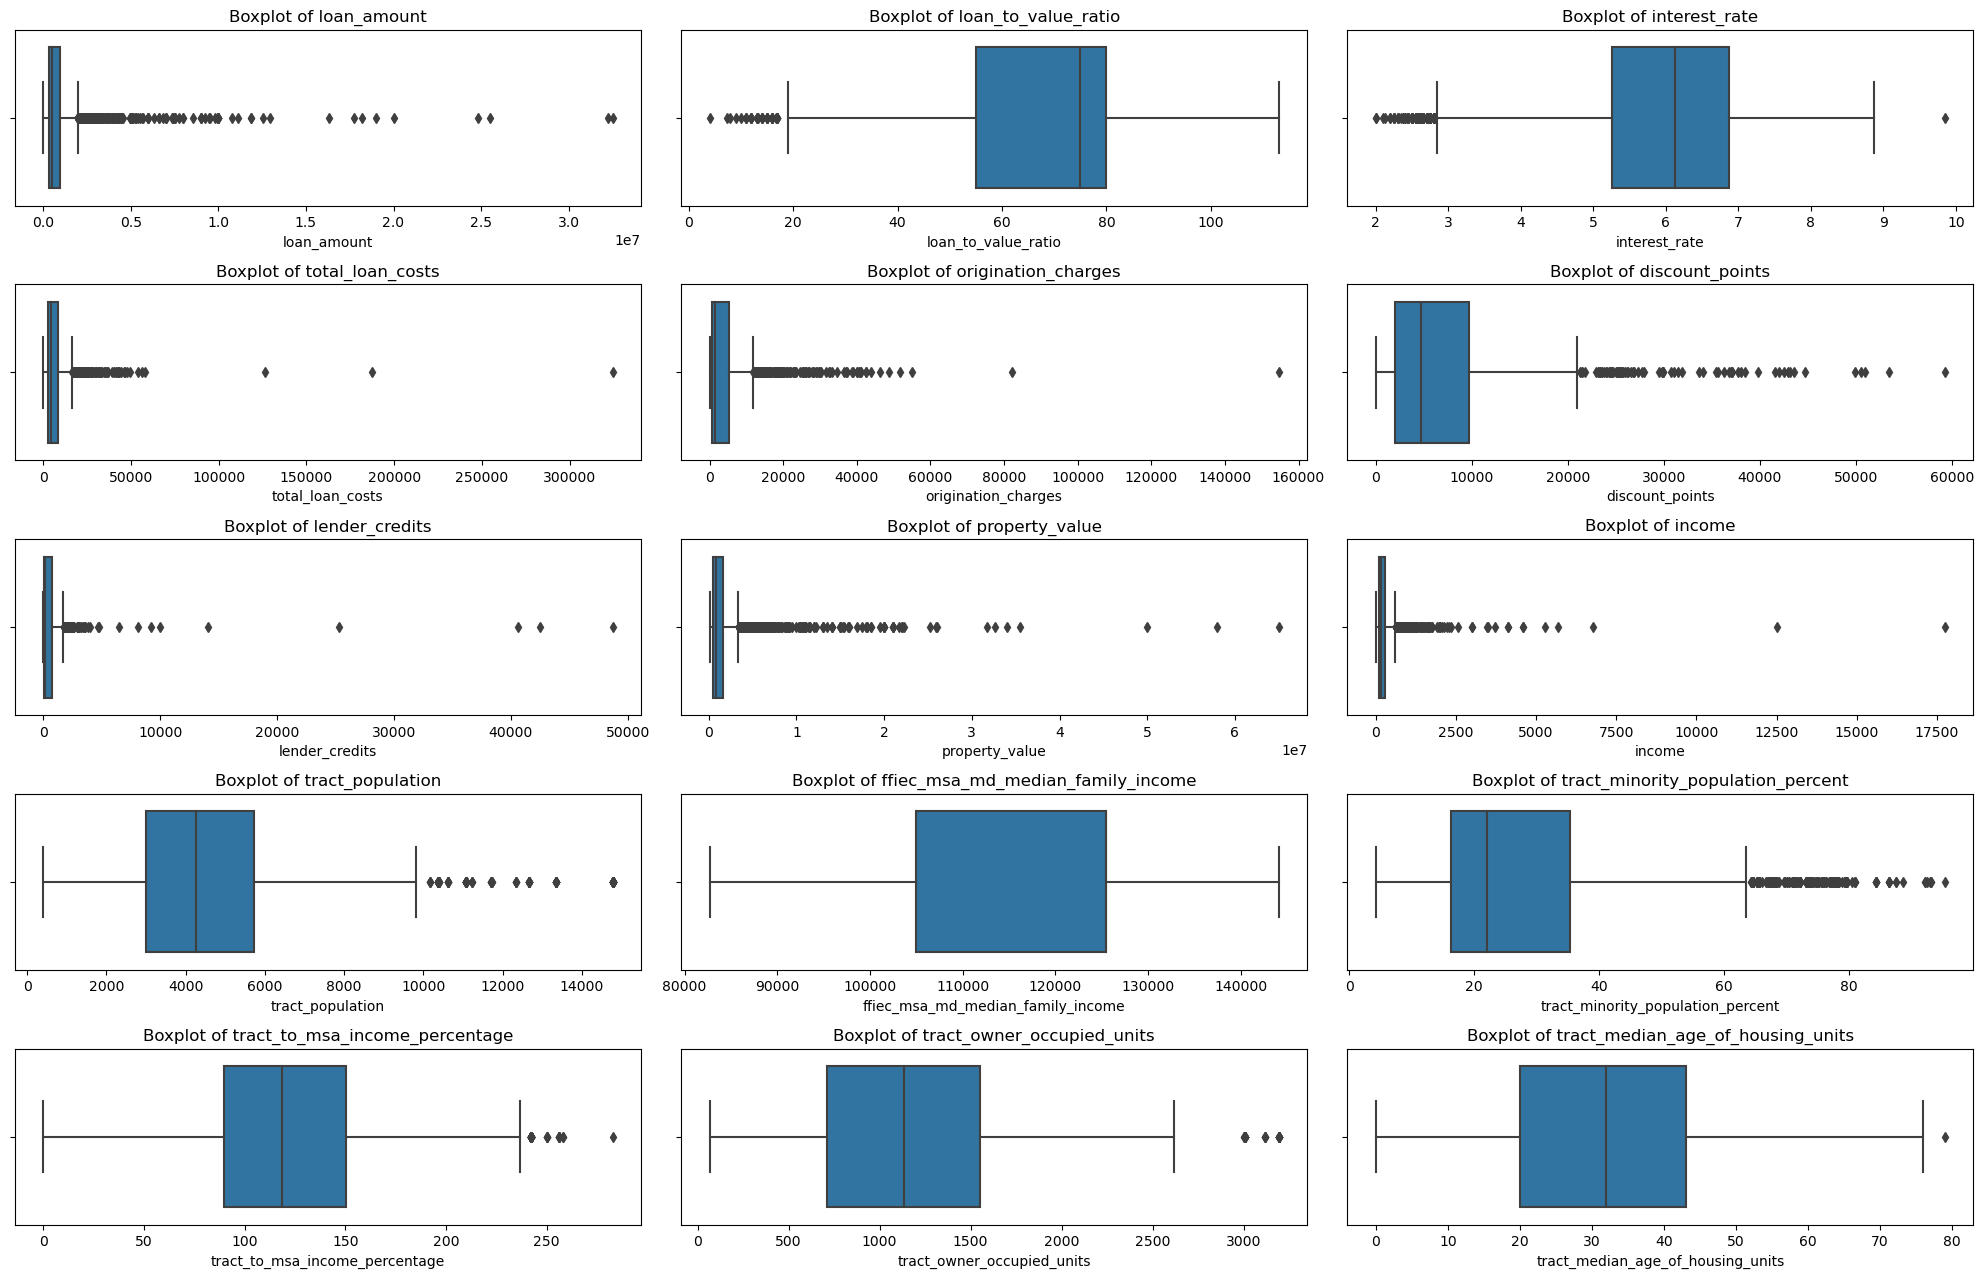

Outliers after removal:
Outliers still present in 'loan_amount':
      loan_amount
2195   1125000.00 

All outliers removed from 'loan_to_value_ratio'.

All outliers removed from 'interest_rate'.

All outliers removed from 'total_loan_costs'.

All outliers removed from 'origination_charges'.

Outliers still present in 'discount_points':
      discount_points
811          12365.30
1049         12301.30
1781         12980.50
1793         13046.22
2195         12185.60 

Outliers still present in 'lender_credits':
     lender_credits
684          200.00
755          260.00
788          243.00
877          224.90
886          152.95 

Outliers still present in 'property_value':
      property_value
1810      1465000.00
2000      1475000.00
2195      1405000.00 

Outliers still present in 'income':
      income
1021  436.00
1302  409.00 

All outliers removed from 'tract_population'.

All outliers removed from 'ffiec_msa_md_median_family_income'.

All outliers removed from 'tract_minority_p

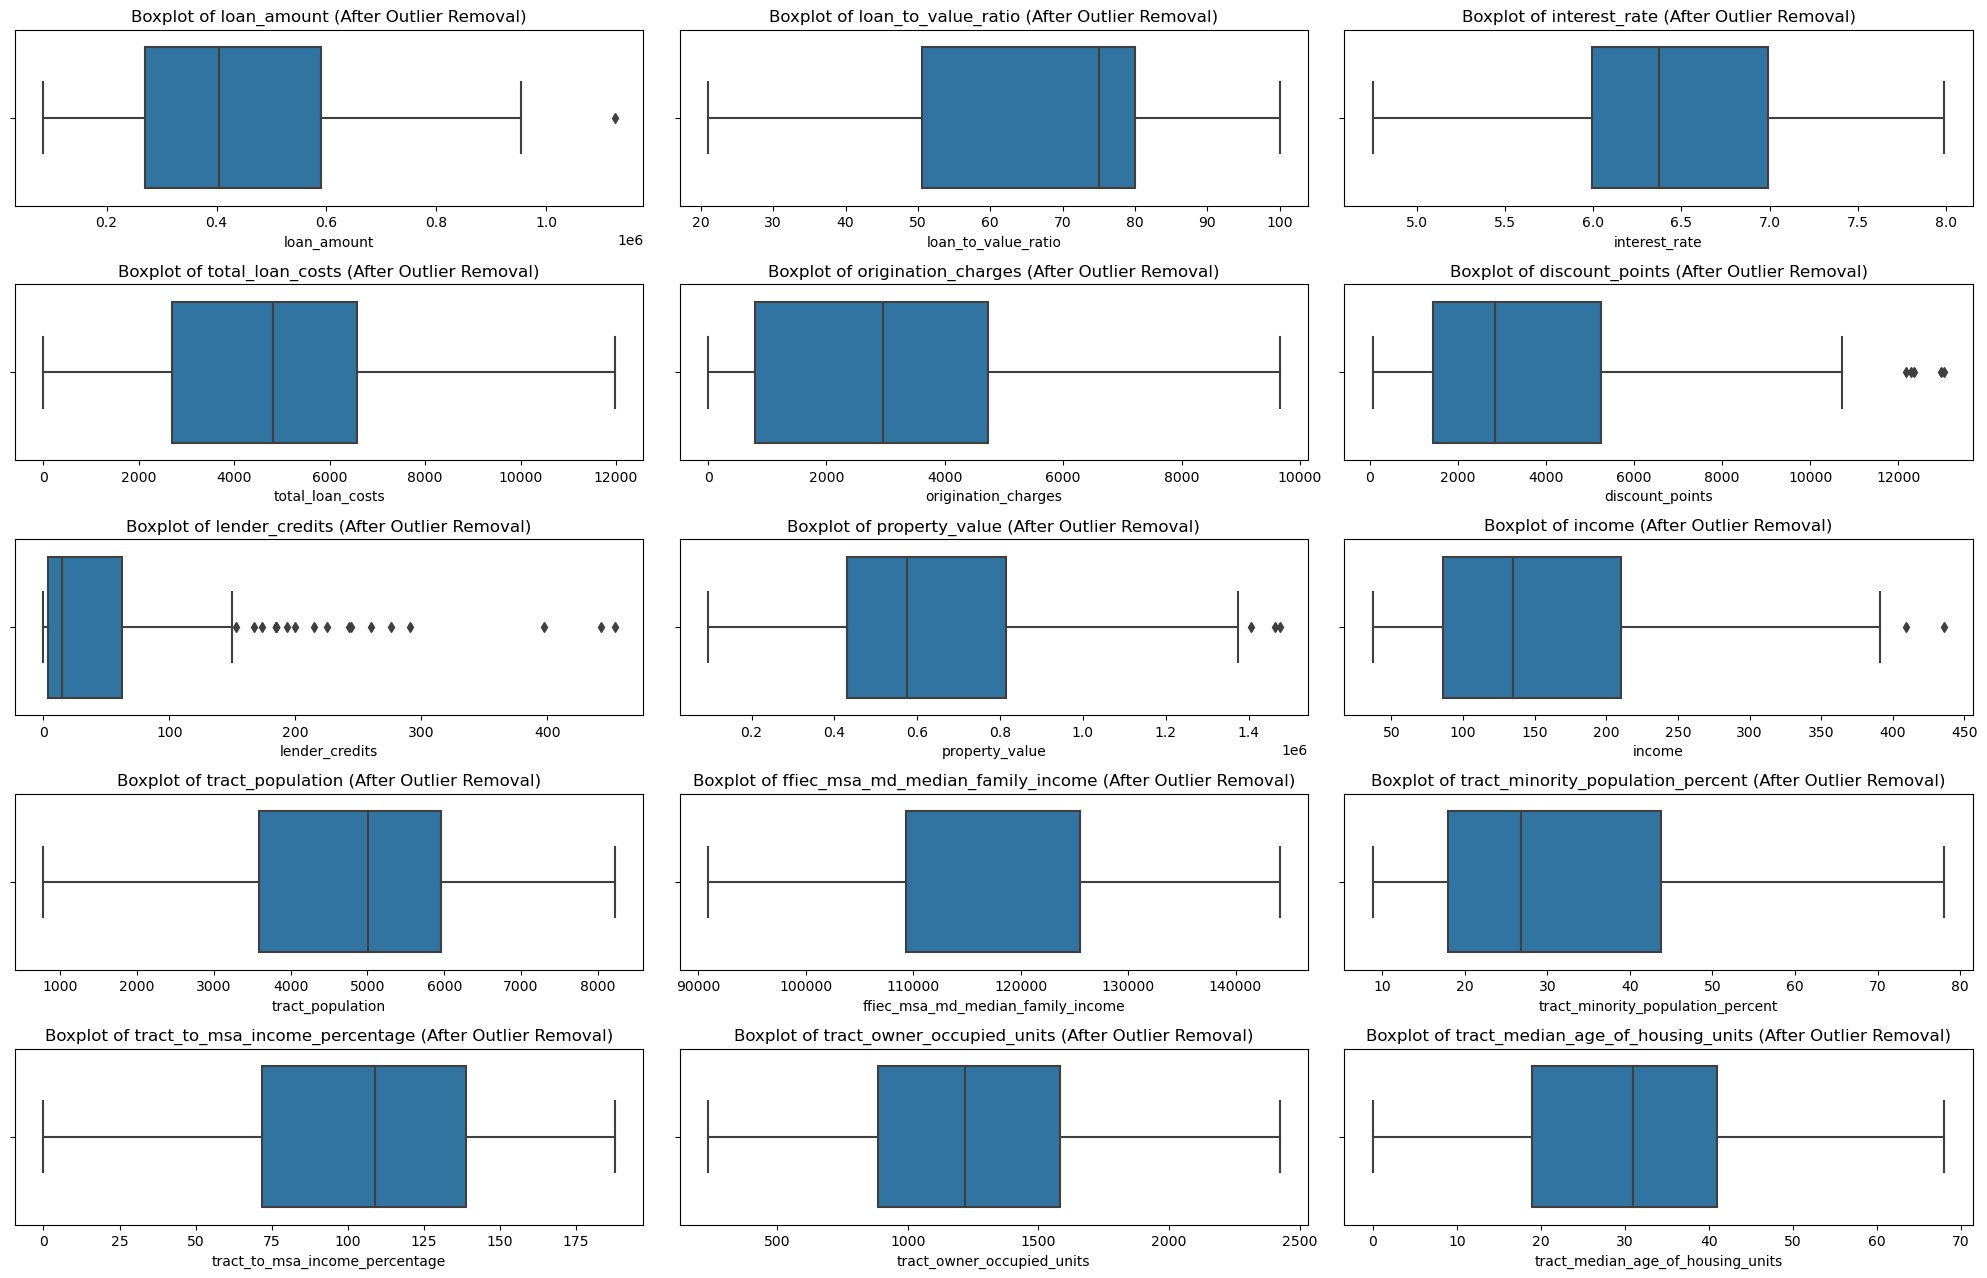

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# List of columns to check for outliers
outlier_columns = [
    'loan_amount',
    'loan_to_value_ratio',
    'interest_rate',
    'total_loan_costs',
    'origination_charges',
    'discount_points',
    'lender_credits',
    'property_value',
    'income',
    'tract_population',
    'ffiec_msa_md_median_family_income',
    'tract_minority_population_percent',
    'tract_to_msa_income_percentage',
    'tract_owner_occupied_units',
    'tract_median_age_of_housing_units',
]

# Function to calculate outliers using IQR
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate and show outliers for specified columns
outlier_summary = {}

for col in outlier_columns:
    lower_bound, upper_bound = calculate_outliers(mortgage, col)
    outliers = mortgage[(mortgage[col] < lower_bound) | (mortgage[col] > upper_bound)]
    outlier_summary[col] = outliers

# Display the outliers for each column
for col, outliers in outlier_summary.items():
    print(f"Outliers in '{col}':")
    print(outliers[[col]].head(), "\n")  # Show first few outliers for each column

# Set up the plotting area
plt.figure(figsize=(20, 15))

# Create boxplots for the outlier columns
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(6, 3, i)  # Adjust subplot grid size as needed
    sns.boxplot(x=mortgage[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Remove outliers from the DataFrame
for col in outlier_columns:
    lower_bound, upper_bound = calculate_outliers(mortgage, col)
    mortgage = mortgage[(mortgage[col] >= lower_bound) & (mortgage[col] <= upper_bound)]

# Calculate and show outliers for specified columns after removal
outlier_summary_after = {}

for col in outlier_columns:
    lower_bound, upper_bound = calculate_outliers(mortgage, col)
    outliers_after = mortgage[(mortgage[col] < lower_bound) | (mortgage[col] > upper_bound)]
    outlier_summary_after[col] = outliers_after

# Display the outliers for each column after removal
print("Outliers after removal:")
for col, outliers in outlier_summary_after.items():
    if not outliers.empty:
        print(f"Outliers still present in '{col}':")
        print(outliers[[col]].head(), "\n")  # Show first few outliers for each column
    else:
        print(f"All outliers removed from '{col}'.\n")

# Set up the plotting area for boxplots after removing outliers
plt.figure(figsize=(20, 15))

# Create boxplots for the outlier columns after removal
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(6, 3, i)  # Adjust subplot grid size as needed
    sns.boxplot(x=mortgage[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')

plt.tight_layout()
plt.show()

In [26]:
print(mortgage['loan_type'].dtype)
mortgage['loan_type'] = mortgage['loan_type'].astype(int)

# Defining the loan type mapping
loan_type_mapping = {
    1: "Conventional",
    2: "Federal Housing Administration insured",
    3: "Veterans Affairs guaranteed",
    4: "USDA Rural Housing Service or Farm Service Agency guaranteed"
}

loan_counts = mortgage['loan_type'].value_counts()
loan_summary = loan_counts.rename_axis('Loan Type').reset_index(name='Count')
loan_summary['Description'] = loan_summary['Loan Type'].map(loan_type_mapping)
print(loan_summary)

object
   Loan Type  Count                                        Description
0          1   2732                                       Conventional
1          2     43             Federal Housing Administration insured
2          3     31                        Veterans Affairs guaranteed
3          4      2  USDA Rural Housing Service or Farm Service Age...


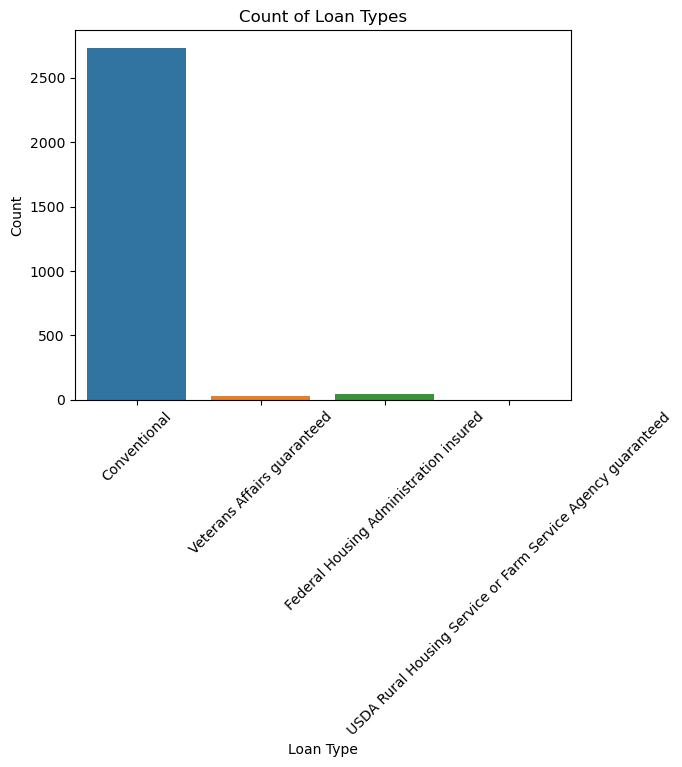

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a mapping for loan types
loan_type_mapping = {
    1: "Conventional",
    2: "Federal Housing Administration insured",
    3: "Veterans Affairs guaranteed",
    4: "USDA Rural Housing Service or Farm Service Agency guaranteed"
}

# Create a new column in the DataFrame for the loan type descriptions
mortgage['loan_type_description'] = mortgage['loan_type'].map(loan_type_mapping)

# Create a countplot using the new column with descriptions
sns.countplot(x='loan_type_description', data=mortgage)

# Set the title and labels
plt.title('Count of Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [28]:
mortgage.drop(columns=mortgage.columns[-1],  axis=1,  inplace=True)

In [29]:
mortgage.head()

activity_year                   lei derived_msa-md state_code county_code  \
0          2023  7H6GLXDRUGQFU57RNE97          14500         CO        8013   
1          2023  7H6GLXDRUGQFU57RNE97          24540         CO        8123   
2          2023  7H6GLXDRUGQFU57RNE97          17820         CO        8041   
3          2023  7H6GLXDRUGQFU57RNE97          22660         CO        8069   
4          2023  7H6GLXDRUGQFU57RNE97          24540         CO        8123   

  census_tract conforming_loan_limit derived_loan_product_type  \
0   8013060900                     C   Conventional:First Lien   
1   8123001905                     C   Conventional:First Lien   
2   8041003306                     C   Conventional:First Lien   
3   8069001106                     C   Conventional:First Lien   
4   8123002008                     C   Conventional:First Lien   

              derived_dwelling_category        derived_ethnicity  ...  \
0  Single Family (1-4 Units):Site-Built  Ethnicity Not Available  ...   
1  Single Family (1-4 Units):Site-Built  Ethnicity Not Available  ...   
2  Single Family (1-4 Units):Site-Built  Ethnicity Not Available  ...   
3  Single Family (1-4 Units):Site-Built  Ethnicity Not Available  ...   
4  Single Family (1-4 Units):Site-Built  Ethnicity Not Available  ...   

  denial_reason-2 denial_reason-3 denial_reason-4 tract_population  \
0             NaN             NaN             NaN             5441   
1             NaN             NaN             NaN             4712   
2             NaN             NaN             NaN             3248   
3             NaN             NaN             NaN             5312   
4             NaN             NaN             NaN             6148   

  tract_minority_population_percent  ffiec_msa_md_median_family_income  \
0                             24.79                             144100   
1                             63.60                             109300   
2                             24.88                             105000   
3                             21.69                             118700   
4                             21.01                             109300   

  tract_to_msa_income_percentage tract_owner_occupied_units  \
0                          90.75                       1480   
1                          74.38                       1135   
2                         153.20                        983   
3                          67.28                       1033   
4                         163.09                       1504   

  tract_one_to_four_family_homes tract_median_age_of_housing_units  
0                           1669                                30  
1                           1531                                32  
2                           1226                                27  
3                           1512                                41  
4                           1493                                14  

[5 rows x 99 columns]

#### Finding the mutual information: What is mutual information?
Mutual information is the function that measures the amount of information gained about one feature through another. We can calculate mutual information between features. And in this case, the mutual information is calculated for the numerical features alone because it can only be calculated for the numerical values.

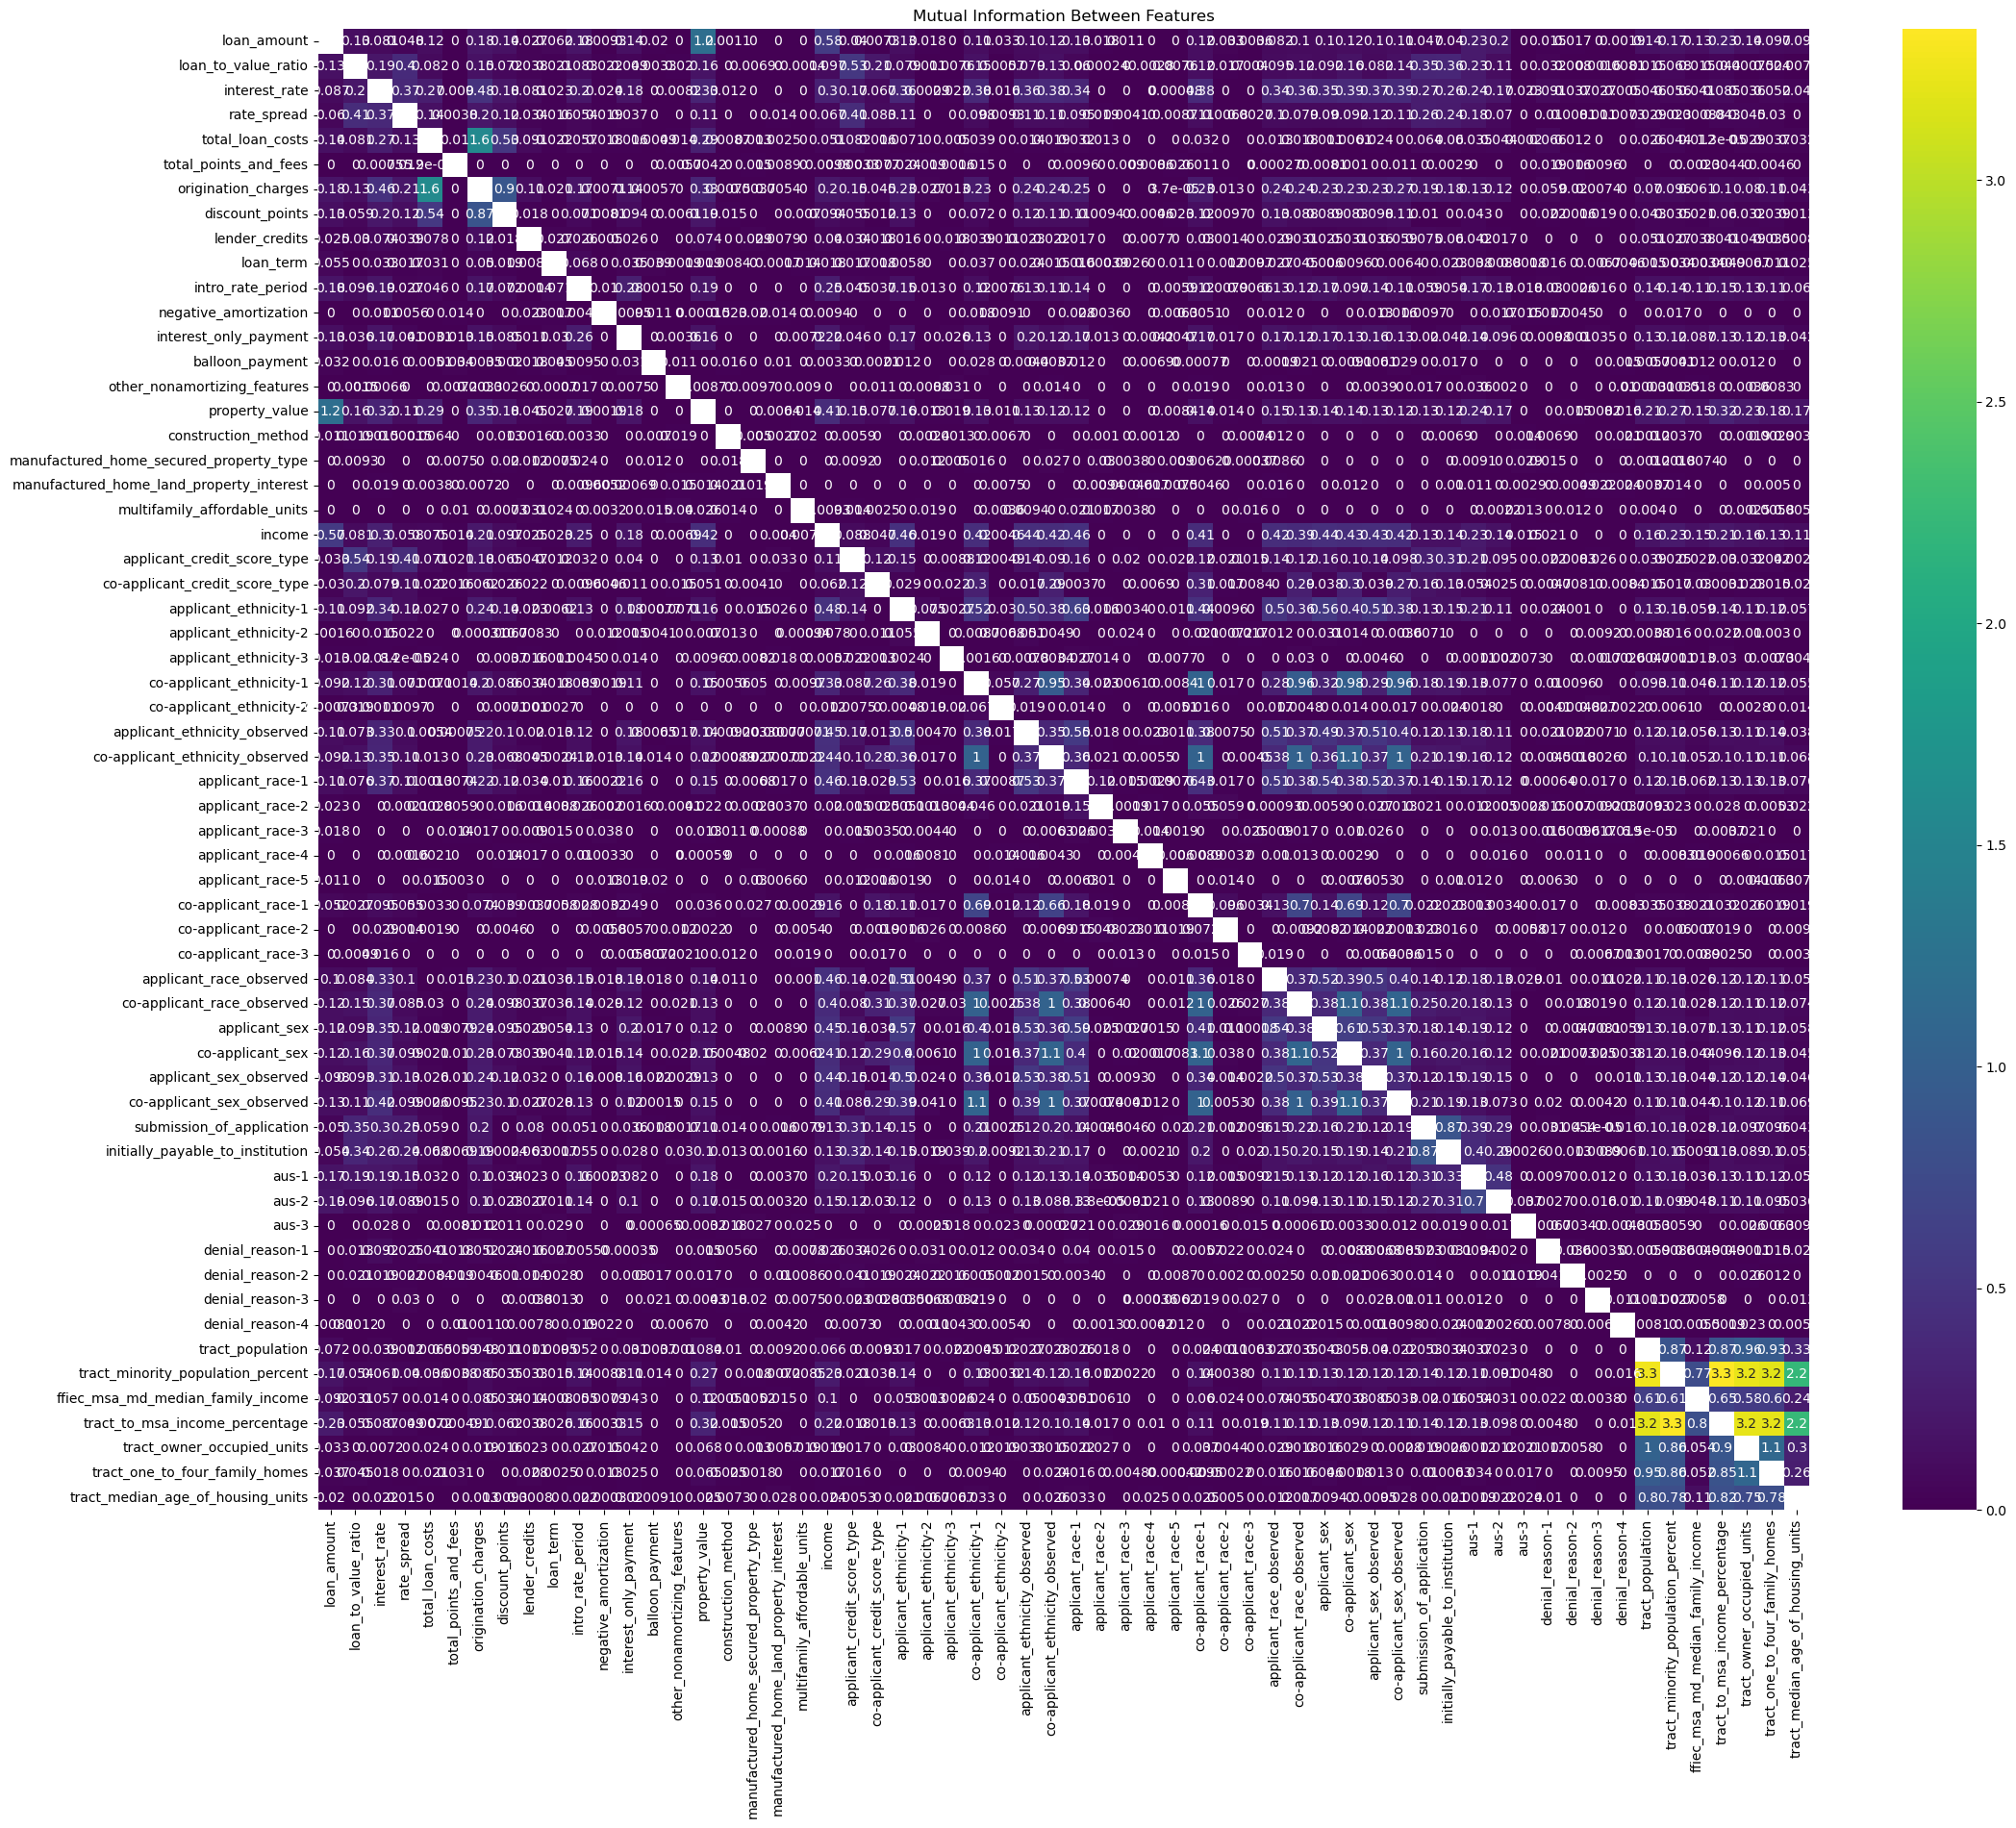

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

numeric_features_clean = mortgage[numeric_columns]
numeric_features_clean = numeric_features_clean.dropna(axis=1, how='all')

# If any remaining columns still have NaN values, we fill them with the mean of the column
numeric_features_clean = numeric_features_clean.fillna(numeric_features_clean.mean())

# Initializing an empty DataFrame to store the mutual information
mi_matrix = pd.DataFrame(index=numeric_features_clean.columns, columns=numeric_features_clean.columns)

# This piece of code calcuates the mutual information between all numeric features
for col1 in numeric_features_clean.columns:
    for col2 in numeric_features_clean.columns:
        if col1 != col2:
            try:
                mi = mutual_info_regression(numeric_features_clean[[col1]], numeric_features_clean[col2])
                mi_matrix.loc[col1, col2] = mi[0]
            except ValueError as e:
                print(f"Skipping pair ({col1}, {col2}) due to an error: {e}")
                mi_matrix.loc[col1, col2] = 0

# Converting the mutual information matrix to numeric values for heatmap
mi_matrix = mi_matrix.astype(float)

# Plotting the same
plt.figure(figsize=(25, 20))
sns.heatmap(mi_matrix, cmap='viridis', annot=True)
plt.title('Mutual Information Between Features')
plt.show()

From the above mutual information heatmap, we can say that the features `tract_population` and `tract_owner_occupied_units` are moderately related while the  `tract_population` and `tract_to_msa_income_percentage` are very highly correlated. The featues `tract_to_msa_income_percentage` and `tract_minority_population_percent` are also very highly correlated. 

We also notice that the feature `tract_to_msa_income_percentage` is very highly correlated with `tract_owner_occupied_units` and `tract_one_to_four_family_homes` too.

#### Now that we have caculated the mutual information for each of the numerical features, we will list them out by ranking them according to their mutual information gain value. This in turn tells us about the feature importance, which basically means the feature with the highest rank will have the most amount importance which will contribute the most of the modeling aspect of it. After we list these feature importance, we plot them using the barplot.

Feature Importances (Ranked by Mutual Information):
tract_to_msa_income_percentage             0.33
tract_minority_population_percent          0.33
co-applicant_sex                           0.20
co-applicant_race_observed                 0.19
co-applicant_sex_observed                  0.19
co-applicant_ethnicity_observed            0.19
co-applicant_ethnicity-1                   0.17
income                                     0.16
applicant_sex                              0.15
applicant_ethnicity-1                      0.15
interest_rate                              0.15
origination_charges                        0.15
applicant_race-1                           0.15
applicant_sex_observed                     0.14
applicant_race_observed                    0.14
applicant_ethnicity_observed               0.14
property_value                             0.13
initially_payable_to_institution           0.11
submission_of_application                  0.11
loan_amount                         

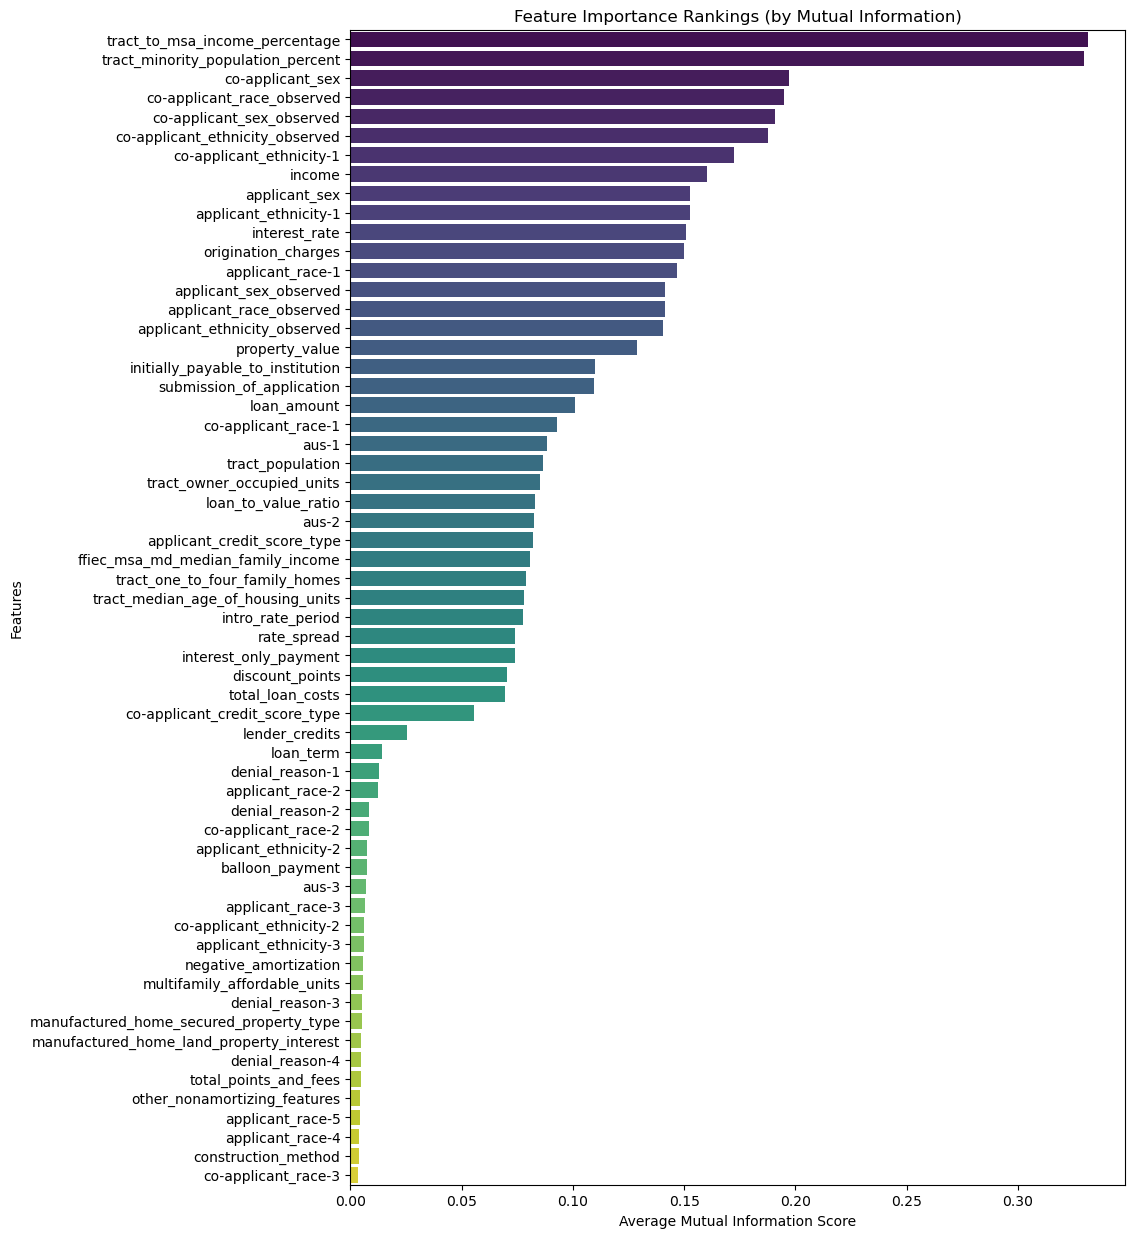

In [31]:
# Rank features by their average mutual information scores
feature_importance = mi_matrix.mean(axis=1).sort_values(ascending=False)

print("Feature Importances (Ranked by Mutual Information):")
print(feature_importance)

# Visualize the feature importance rankings
plt.figure(figsize=(10, 15))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance Rankings (by Mutual Information)')
plt.xlabel('Average Mutual Information Score')
plt.ylabel('Features')
plt.show()

#### What is PCA and when is it most useful? 
Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional datasets into a smaller set of "principal components," while retaining as much variability (information) from the original data as possible. The key idea behind PCA is to reduce the number of features (dimensions) in a dataset while minimizing the loss of information.

Datasets with many features can suffer from the "curse of dimensionality," where it becomes difficult to process, visualize, and analyze data efficiently. PCA reduces the dimensionality, making analysis computationally cheaper and easier to interpret. 
In datasets where many features are correlated, PCA can remove redundancy by combining correlated features into a smaller number of uncorrelated principal components. High-dimensional data can lead to overfitting, where models become too complex and perform poorly on new data. PCA reduces dimensionality, helping models generalize better.

Now that we know the importance of PCA, let's implement it on our data as it is very essential for us to reduce the dimension of the data. We standardize the numeric features before performing PCA. In our case we choose enough components to explain 95% of the variance.

Number of components selected: 33


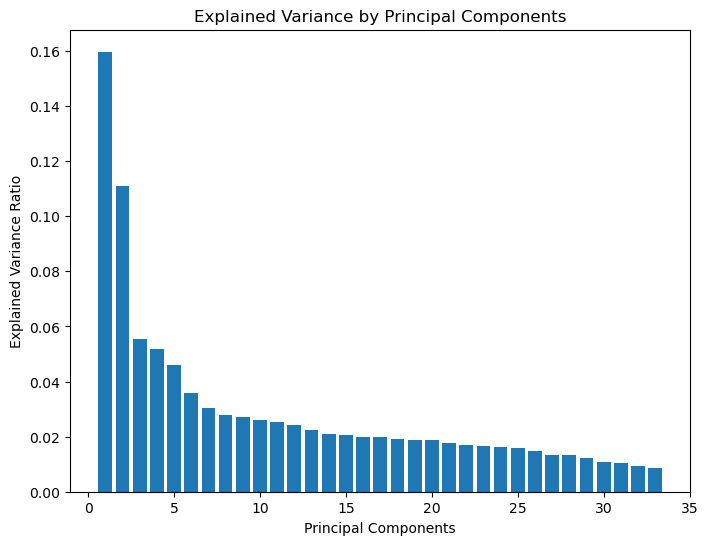

PCA Components Shape:  (2808, 33)


In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features_clean)

pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(numeric_features_scaled)
print("Number of components selected:", pca.n_components_)

# Visualize explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
print("PCA Components Shape: ", pca_df.shape)

From the above visualization, we see that the PCA has reduced the number of numeric features from 70 to 33. This has reduced a lot of dimentionality making our job easier. 

#### From the below plot we can also compute the cumulative explained variance to see how much variance is captured as you add more components. Automatically reducing the number of components based on variance thresholds (e.g., n_components=0.95) can be more efficient and data-driven compared to specifying the number of principal components we need.

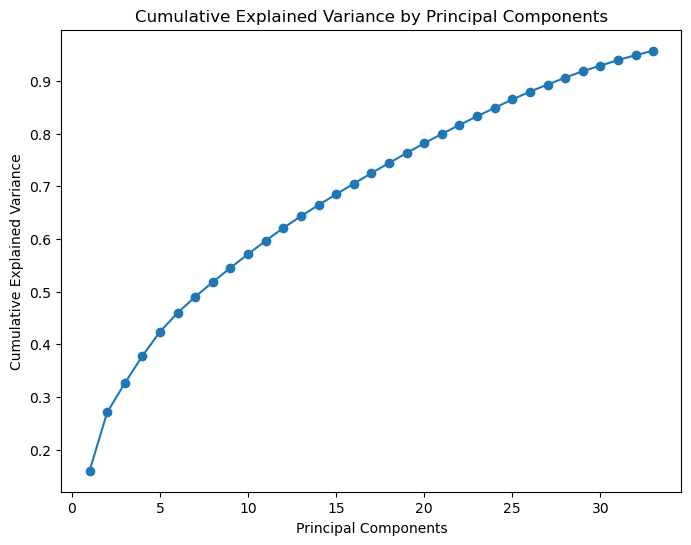

In [33]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

#### What is Cramér's V and its significance?
Cramér's V is a statistical measure used to assess the strength of association between two categorical variables. It is based on the chi-squared statistic and provides a normalized value between 0 and 1, where:
* 0 indicates no association (the variables are independent).
* 1 indicates a perfect association (the variables are fully dependent on each other).

Now, similar to mutual information gain for numerical features, let's calculate the Cramér's V for all the categorical features.

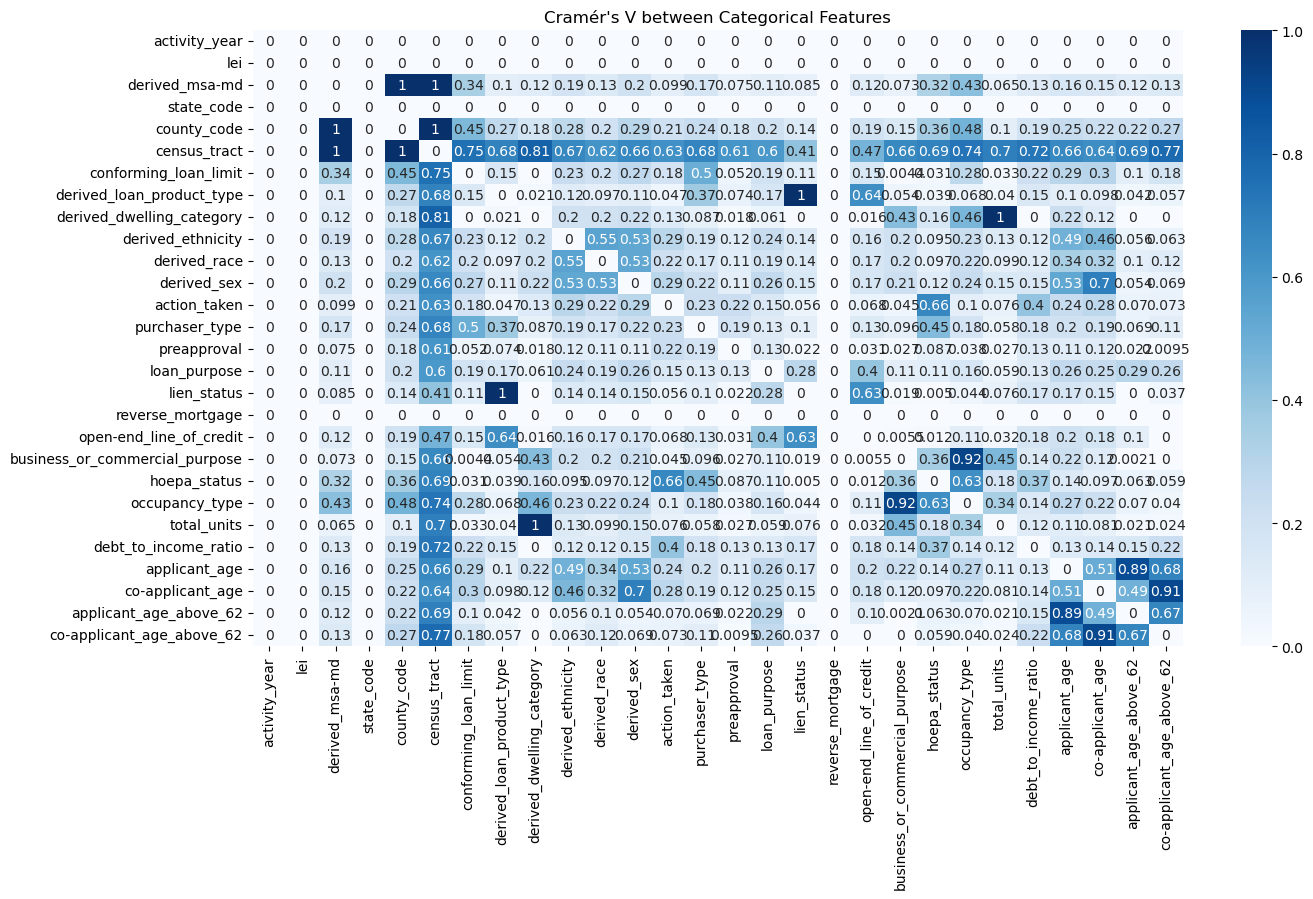

In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] == 1 or confusion_matrix.shape[1] == 1:
        return np.nan 
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    denominator = n * (min(confusion_matrix.shape) - 1)
    if denominator == 0:
        return np.nan 
    return np.sqrt(chi2 / denominator)

categorical_columns = mortgage.select_dtypes(include=['object', 'category']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(mortgage[col1], mortgage[col2])

cramers_v_matrix = cramers_v_matrix.astype(float).fillna(0)

plt.figure(figsize=(15, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='Blues')
plt.title("Cramér's V between Categorical Features")
plt.show()

From the above Cramér's V heatmap, we can say that the features `census_tract` and `derived_race` are moderately related. This implies  some degree of association between the geographic area represented by census_tract and the race of the applicant. 

The `business_or_commercial_purpose` and `occupancy_type` are very highly correlated. A strong association between these two features likely means that loans for business or commercial purposes are consistently linked to specific types of property occupancy (e.g., owner-occupied vs. investment properties). For instance, loans meant for commercial purposes may rarely be associated with owner-occupied properties, hence showing a high correlation.

The featues `county_code` and `derived_msa` are also very highly correlated. The fact that these two features are highly correlated suggests that counties (county_code) strongly align with Metropolitan Statistical Areas (derived_msa). This is expected since counties within the same region often belong to the same MSA, indicating that location-based information is closely related.

We also notice that the feature `census_tract` is very highly correlated with a bunch of features such as `county_code`, `conforming_loan_limit`,`derived_loan_product_type`, `applicant_age_above_62`, `derived_dwelling_category` and a couple of more features. This indicates that certain areas may have higher loan limits based on housing markets. Certain areas may have older populations more likely to apply for loans.

#### Now that we have caculated the Cramér's V for each of the categorical features, we will list them out by ranking them according to their Cramér's V value. This in turn tells us about the feature importance, which basically means the feature with the highest rank will have the most amount importance which will contribute the most of the modeling aspect of it. After we list these feature importance, we plot them using the barplot.

Categorical Feature Importances (Ranked by Cramér's V):
census_tract                     15.85
applicant_age                     7.19
county_code                       7.08
co-applicant_age                  6.74
occupancy_type                    6.42
derived_sex                       6.23
derived_ethnicity                 5.76
derived_msa-md                    5.33
derived_race                      5.14
hoepa_status                      5.12
conforming_loan_limit             5.02
purchaser_type                    4.94
action_taken                      4.77
co-applicant_age_above_62         4.76
loan_purpose                      4.72
derived_loan_product_type         4.50
business_or_commercial_purpose    4.49
derived_dwelling_category         4.46
debt_to_income_ratio              4.38
applicant_age_above_62            4.30
open-end_line_of_credit           4.17
total_units                       3.98
lien_status                       3.94
preapproval                       2.50
reverse_

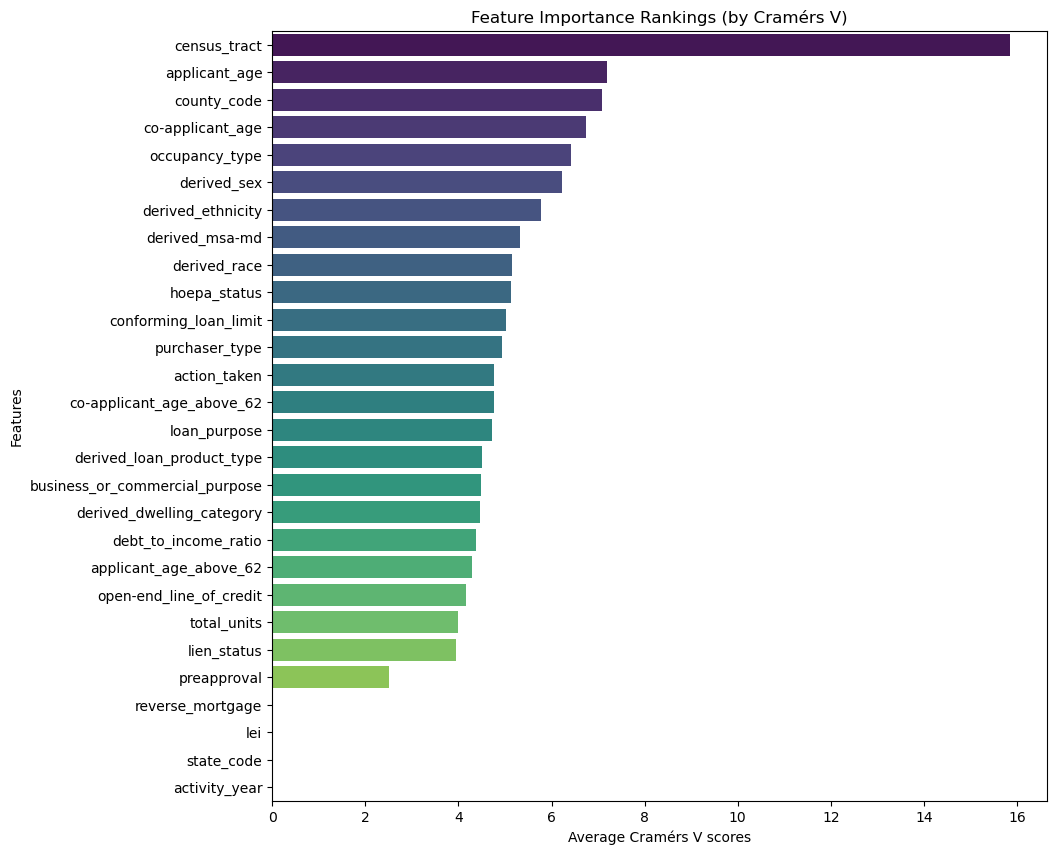

In [35]:
# Rank categorical features by their importance (sum of Cramér's V scores)
categorical_importance = cramers_v_matrix.sum(axis=1).sort_values(ascending=False)
print("Categorical Feature Importances (Ranked by Cramér's V):")
print(categorical_importance)

# Select the top N important categorical features (e.g., top 5)
top_categorical_features = categorical_importance.index[:5]
print(f"Top {len(top_categorical_features)} Categorical Features: {top_categorical_features}")

plt.figure(figsize=(10, 10))
sns.barplot(x=categorical_importance.values, y=categorical_importance.index, palette='viridis')
plt.title('Feature Importance Rankings (by Cramérs V)')
plt.xlabel('Average Cramérs V scores')
plt.ylabel('Features')
plt.show()

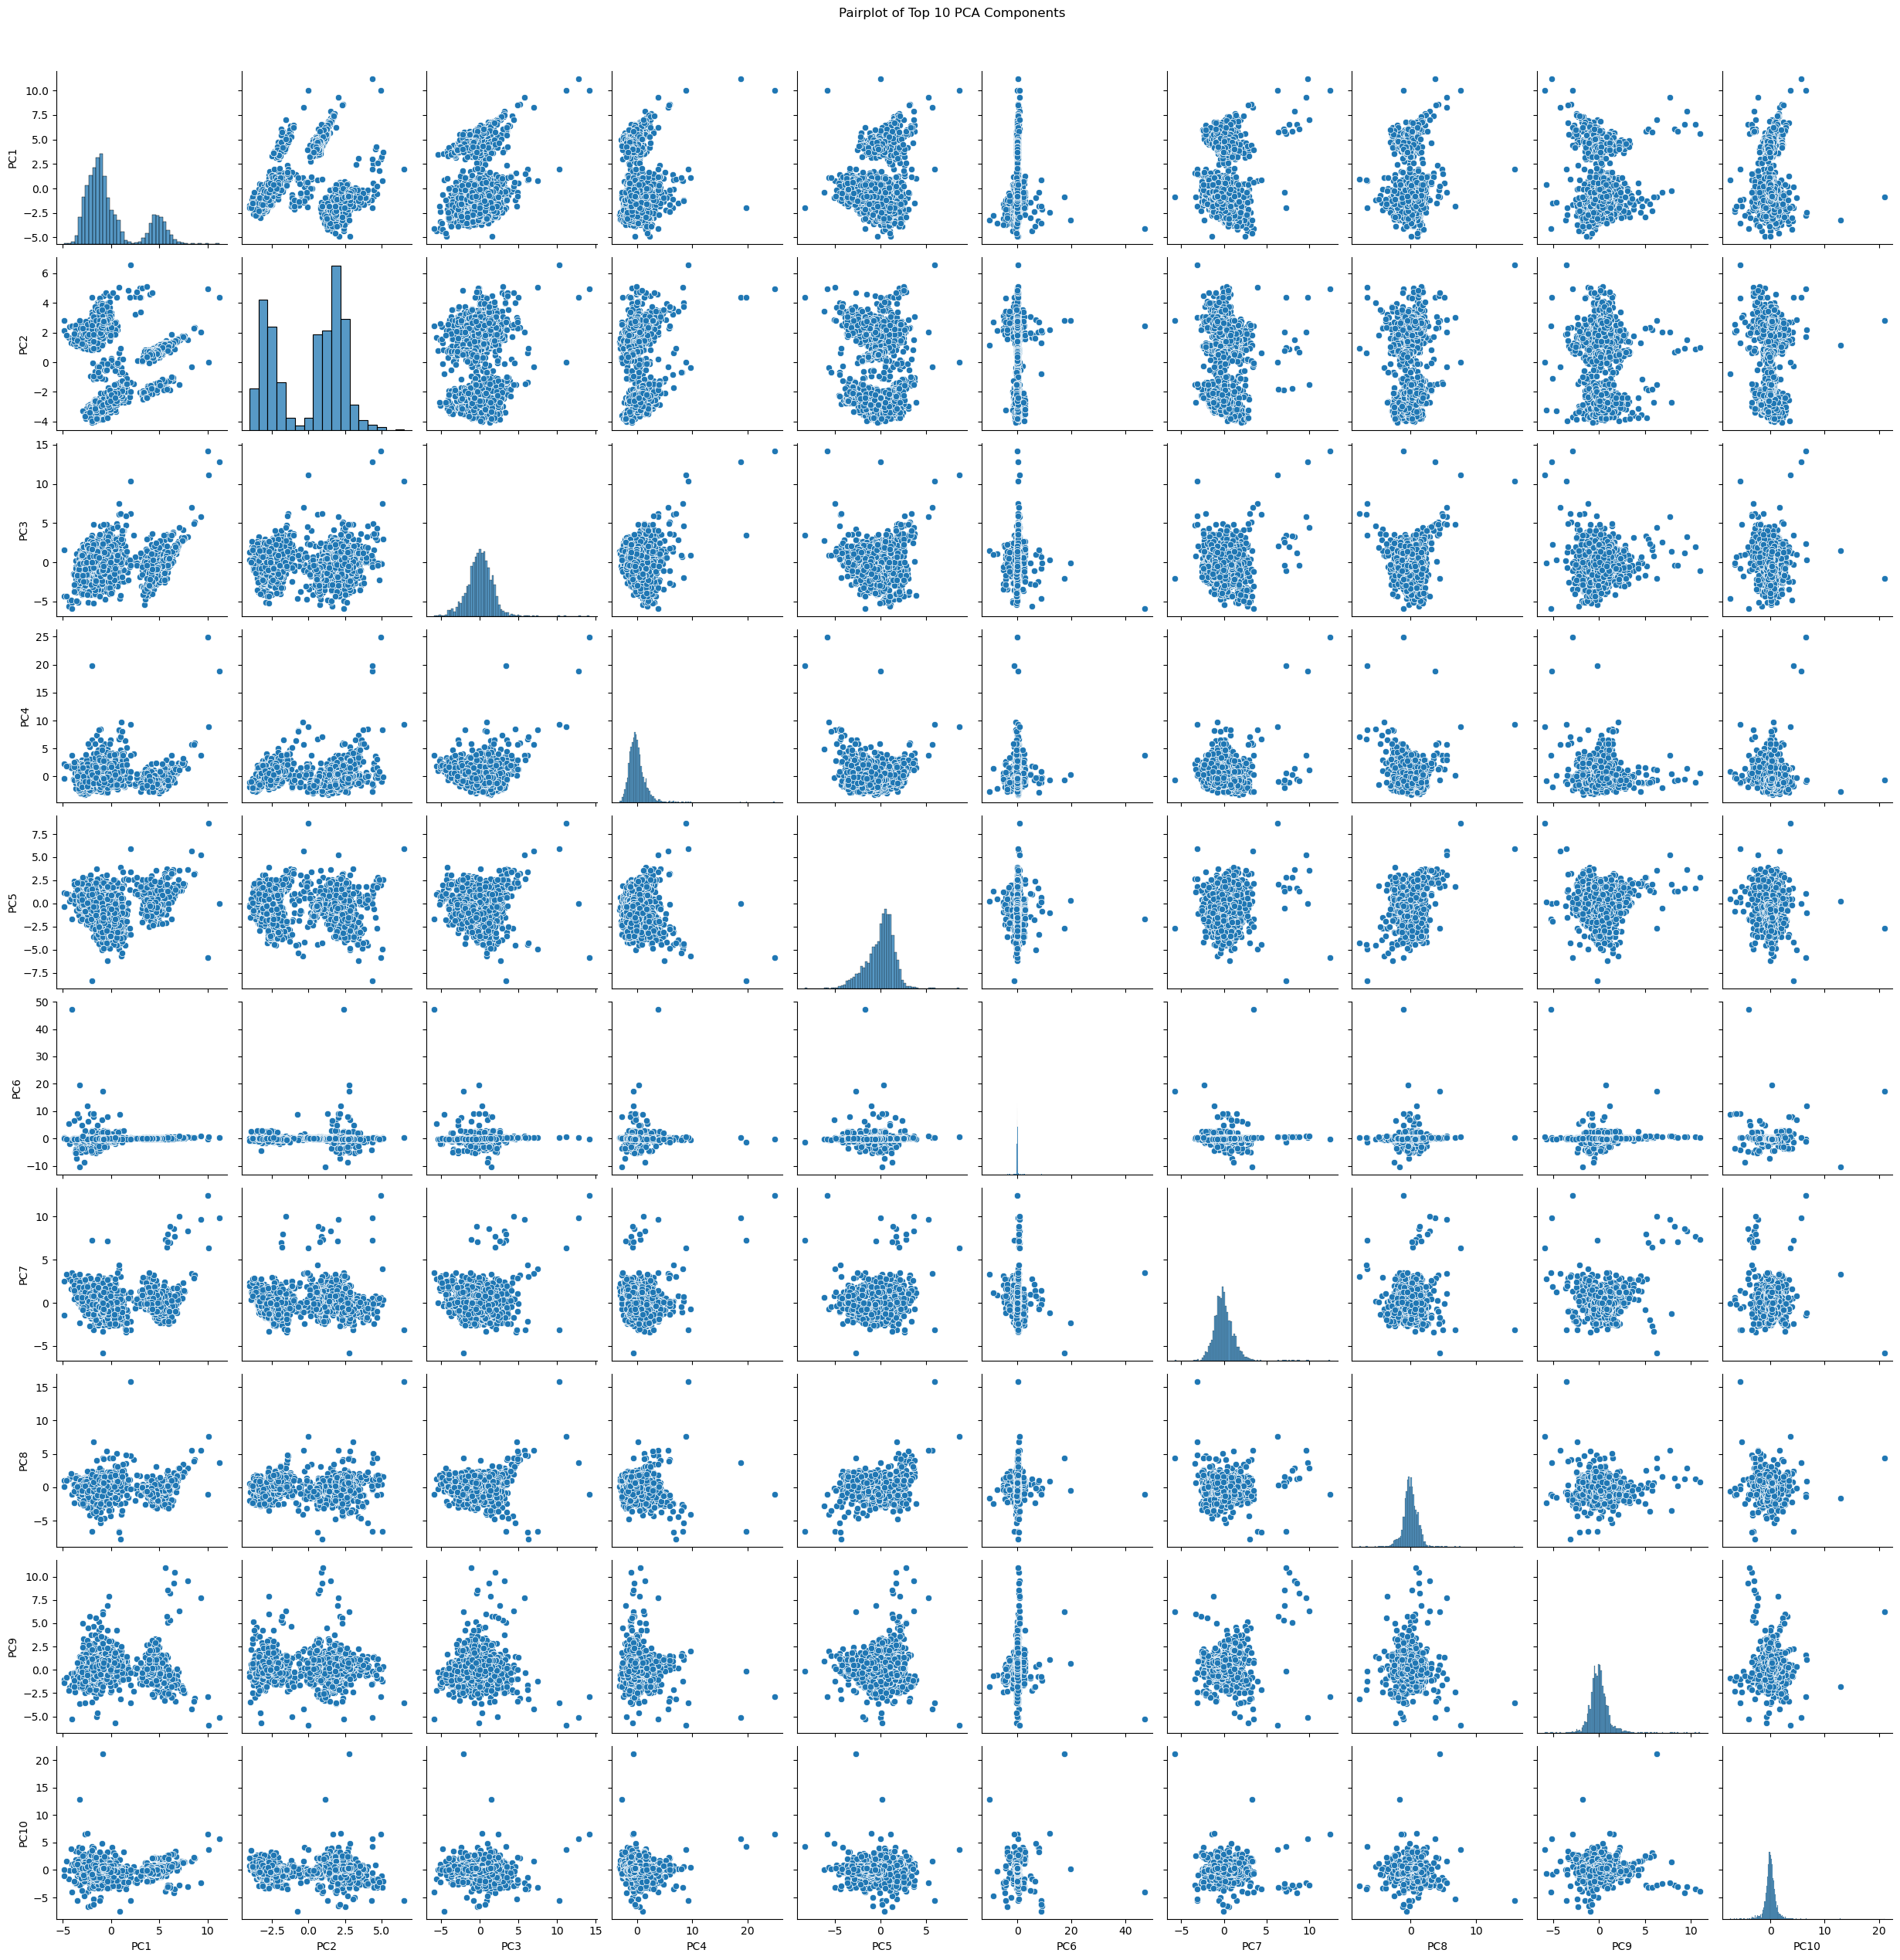

In [36]:
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# Select only the top 10 PCA components
top_10_pca_df = pca_df.iloc[:, :10] 
sns.pairplot(top_10_pca_df)
plt.suptitle('Pairplot of Top 10 PCA Components', y=1.02)
plt.show()

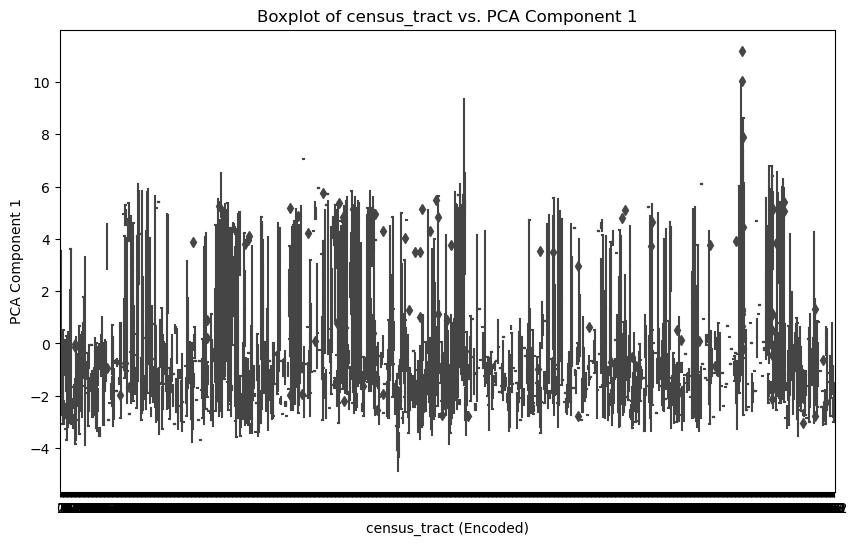

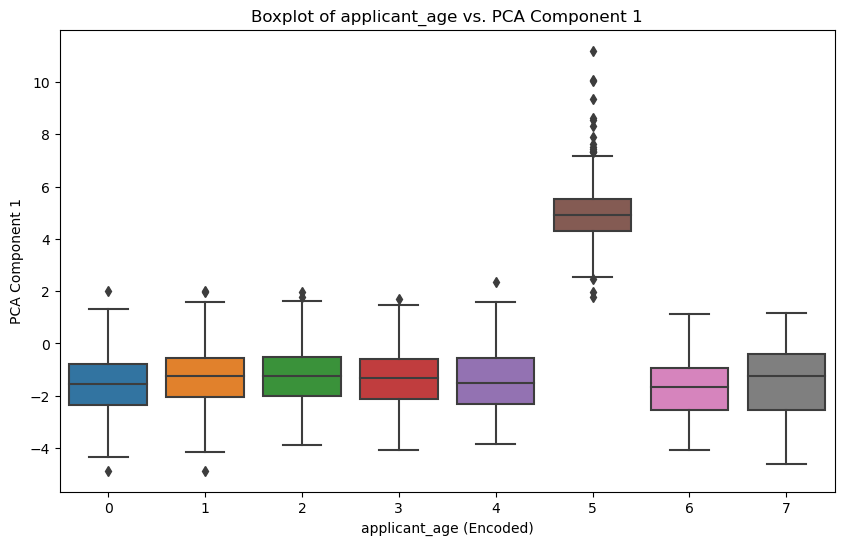

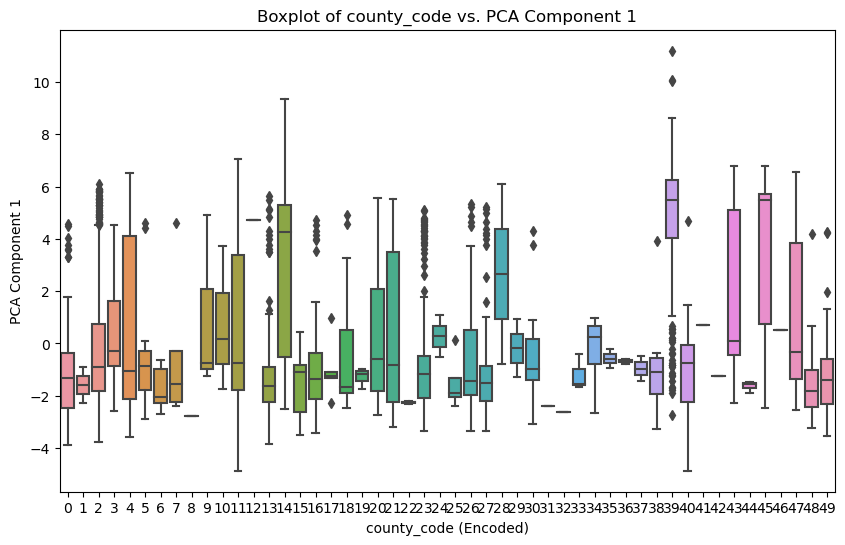

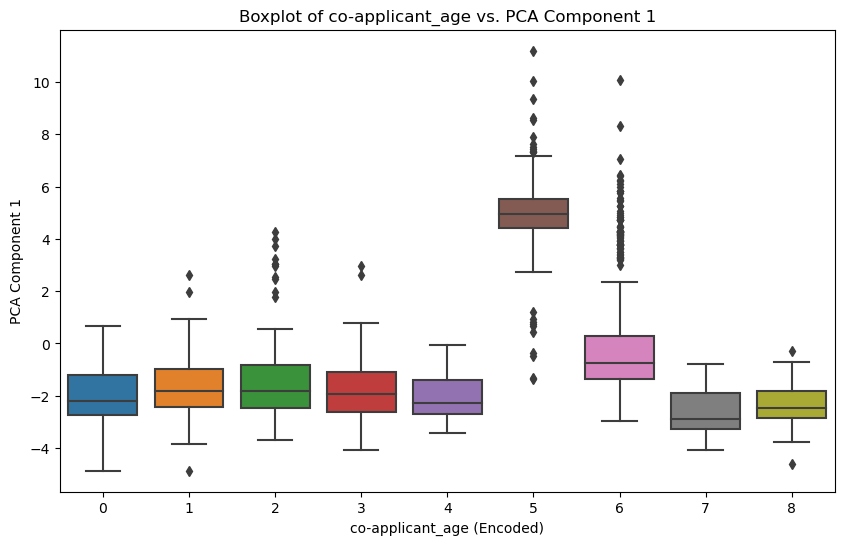

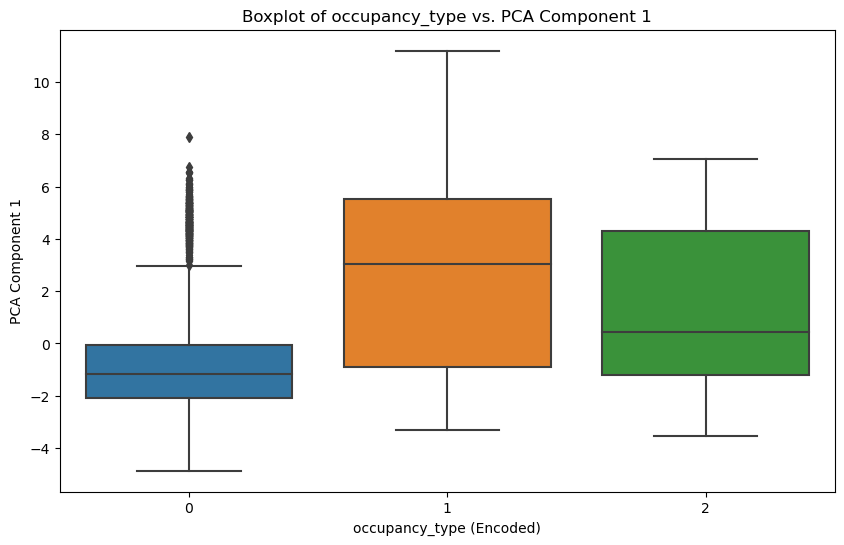

In [39]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = mortgage.select_dtypes(include=['object', 'category']).columns
categorical_features = mortgage[categorical_columns]
# Encode the selected top categorical features into numeric labels
encoded_categorical_features = categorical_features[top_categorical_features].apply(LabelEncoder().fit_transform)

# Plot boxplots for each top categorical feature against the first PCA component
for feature in top_categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=encoded_categorical_features[feature], y=pca_components[:, 0])
    plt.title(f'Boxplot of {feature} vs. PCA Component 1')
    plt.xlabel(f'{feature} (Encoded)')
    plt.ylabel('PCA Component 1')
    plt.show()